In [136]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 

import missingno as msno



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co2-ghg-emissionsdata/co2_emission.csv
/kaggle/input/the-economic-freedom-index/economic_freedom_index2019_data.csv
/kaggle/input/countries-of-the-world/countries of the world.csv
/kaggle/input/cusersmarildownloadsallcsv/all.csv


In [137]:
# Format Options, display only two decimals on float values
pd.set_option('display.float_format', '{:.2f}'.format)
#pd.options.display.float_format = '{:,}'.format
pd.options.display.float_format = "{:,.2f}".format

In [138]:
#Import pertinent datasets

co2 = pd.read_csv("/kaggle/input/co2-ghg-emissionsdata/co2_emission.csv")

freedom = pd.read_csv("/kaggle/input/the-economic-freedom-index/economic_freedom_index2019_data.csv", encoding="cp1252")

countries = pd.read_csv("/kaggle/input/countries-of-the-world/countries of the world.csv")

freedom_world = pd.read_csv("/kaggle/input/cusersmarildownloadsallcsv/all.csv")

In [139]:
#Display column headings, number of values (not-null), and data type

co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          20853 non-null  object 
 1   Code                            18646 non-null  object 
 2   Year                            20853 non-null  int64  
 3   Annual CO₂ emissions (tonnes )  20853 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.8+ KB


In [140]:
freedom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    186 non-null    int64  
 1   Country Name                 186 non-null    object 
 2   WEBNAME                      186 non-null    object 
 3   Region                       186 non-null    object 
 4   World Rank                   180 non-null    float64
 5   Region Rank                  180 non-null    float64
 6   2019 Score                   180 non-null    float64
 7   Property Rights              185 non-null    float64
 8   Judical Effectiveness        185 non-null    float64
 9   Government Integrity         185 non-null    float64
 10  Tax Burden                   180 non-null    float64
 11  Gov't Spending               183 non-null    float64
 12  Fiscal Health                183 non-null    float64
 13  Business Freedom    

In [141]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [142]:
freedom_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 1 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                                                                                            --------------  ----- 
 0   country_territory;region;c/t;edition;status;PR_rating;CL_rating;A1;A2;A3;A;B1;B2;B3;B4;B;C1;C2;C3;C;Add_Q;Add_A;PR;D1;D2;D3;D4;D;E1;E2;E3;E;F1;F2;F3;F4;F;G1;G2;G3;G4;G;CL;Total  1885 non-null   object
dtypes: object(1)
memory usage: 14.9+ KB


In [143]:
#Replace the , for a . to convert these string type values to float values.

countries['Pop. Density (per sq. mi.)'] = countries['Pop. Density (per sq. mi.)'].str.replace(',','.')
countries['Coastline (coast/area ratio)'] = countries['Coastline (coast/area ratio)'].str.replace(',','.')
countries['Net migration'] = countries['Net migration'].str.replace(',','.')
countries['Infant mortality (per 1000 births)'] = countries['Infant mortality (per 1000 births)'].str.replace(',','.')
countries['Literacy (%)'] = countries['Literacy (%)'].str.replace(',','.')
countries['Phones (per 1000)'] = countries['Phones (per 1000)'].str.replace(',','.')
countries['Arable (%)'] = countries['Arable (%)'].str.replace(',','.')
countries['Crops (%)'] = countries['Crops (%)'].str.replace(',','.')
countries['Other (%)'] = countries['Other (%)'].str.replace(',','.')
countries['Birthrate'] = countries['Birthrate'].str.replace(',','.')
countries['Deathrate'] = countries['Deathrate'].str.replace(',','.')
countries['Agriculture'] = countries['Agriculture'].str.replace(',','.')
countries['Industry'] = countries['Industry'].str.replace(',','.')
countries['Service'] = countries['Service'].str.replace(',','.')

In [144]:
#Change the data types of these columns to float type using a dictionary

convert_dict = {'Pop. Density (per sq. mi.)': float,
                'Coastline (coast/area ratio)': float,
                'Net migration': float,
                'Infant mortality (per 1000 births)': float,
                'Literacy (%)': float,
                'Phones (per 1000)': float,
                'Arable (%)' : float,
                'Crops (%)': float,
                'Other (%)': float, 
                'Birthrate': float,
                'Deathrate' : float,
                'Agriculture': float,
                'Industry': float,
                'Service' : float
               }
  
countries = countries.astype(convert_dict)
print(countries.dtypes)

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                                object
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object


In [145]:
#print firts 5 rows to check the result of our changes above

countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.00,0.00,23.06,163.07,700.00,36.00,3.20,12.13,0.22,87.65,1,46.60,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655,28748,124.60,1.26,-4.93,21.52,"4,500.00",86.50,71.20,21.09,4.42,74.49,3,15.11,5.22,0.23,0.19,0.58
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.80,0.04,-0.39,31.00,"6,000.00",70.00,78.10,3.22,0.25,96.53,1,17.14,4.61,0.10,0.60,0.30
3,American Samoa,OCEANIA,57794,199,290.40,58.29,-20.71,9.27,"8,000.00",97.00,259.50,10.00,15.00,75.00,2,22.46,3.27,nan,nan,nan
4,Andorra,WESTERN EUROPE,71201,468,152.10,0.00,6.60,4.05,"19,000.00",100.00,497.20,2.22,0.00,97.78,3,8.71,6.25,nan,nan,nan


In [146]:
#Rename the column heading containing the name of the country, this will help with referential integrity when doing our merge.

co2.rename(columns = {"Entity": "Country_Name", "Annual CO₂ emissions (tonnes )": "CO2_tonnes"}, inplace = True)
freedom.rename(columns = {"Country Name": "Country_Name"}, inplace = True)
countries.rename(columns = {"Country": "Country_Name"}, inplace = True)

co2["Year"] = pd.to_datetime(co2.Year, format='%Y')
countries['Country_Name'] = countries['Country_Name'].str.strip()

In [147]:
#Filter the column year to only have data between 1960 and 2017

co2_filtered = co2.loc[(co2['Year'] >= '1960-01-01')
                     & (co2['Year'] < '2017-01-01')]

In [148]:
# For each country name, average values in CO2_tonnes

co2_grp = co2_filtered.groupby('Country_Name')['CO2_tonnes'].mean()

In [149]:
co2_grp.head()

Country_Name
Afghanistan            2,871,035.19
Africa               682,511,727.76
Albania                4,492,791.13
Algeria               68,491,745.66
Americas (other)   1,467,067,141.14
Name: CO2_tonnes, dtype: float64

In [150]:
co2_index_one = pd.merge(co2_grp, freedom, how="left", on="Country_Name")
co2_index = pd.merge(co2_index_one, countries,how="left", on="Country_Name")



In [151]:
co2_index.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 232
Data columns (total 54 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country_Name                        233 non-null    object 
 1   CO2_tonnes                          233 non-null    float64
 2   CountryID                           170 non-null    float64
 3   WEBNAME                             170 non-null    object 
 4   Region_x                            170 non-null    object 
 5   World Rank                          164 non-null    float64
 6   Region Rank                         164 non-null    float64
 7   2019 Score                          164 non-null    float64
 8   Property Rights                     169 non-null    float64
 9   Judical Effectiveness               169 non-null    float64
 10  Government Integrity                169 non-null    float64
 11  Tax Burden                          164 non-n

In [152]:
# counting unique values 
n = co2_index.nunique(axis=0) 
  
print("No.of.unique values in each column :\n", 
      n)

No.of.unique values in each column :
 Country_Name                          233
CO2_tonnes                            233
CountryID                             170
WEBNAME                               170
Region_x                                5
World Rank                            164
Region Rank                            46
2019 Score                            126
Property Rights                       123
Judical Effectiveness                 127
Government Integrity                   89
Tax Burden                            133
Gov't Spending                        145
Fiscal Health                         138
Business Freedom                      149
Labor Freedom                         142
Monetary Freedom                      123
Trade Freedom                         104
Investment Freedom                     20
Financial Freedom                       9
Tariff Rate (%)                        93
Income Tax Rate (%)                    48
Corporate Tax Rate (%)                

In [153]:
#Count number of empty rows in each column
co2_index.isnull().sum()

Country_Name                           0
CO2_tonnes                             0
CountryID                             63
WEBNAME                               63
Region_x                              63
World Rank                            69
Region Rank                           69
2019 Score                            69
Property Rights                       64
Judical Effectiveness                 64
Government Integrity                  64
Tax Burden                            69
Gov't Spending                        66
Fiscal Health                         66
Business Freedom                      64
Labor Freedom                         65
Monetary Freedom                      65
Trade Freedom                         67
Investment Freedom                    65
Financial Freedom                     68
Tariff Rate (%)                       67
Income Tax Rate (%)                   65
Corporate Tax Rate (%)                65
Tax Burden % of GDP                   69
Gov't Expenditur

In [154]:
#Under construction

#msno.matrix(co2_index, fontsize=16)
#plt.show()



In [155]:
co2_index = co2_index[co2_index['World Rank'].notna()]

In [156]:
# Top 20 largest polluters by average since the 1960
top_co2 = co2_index.nlargest(20,['CO2_tonnes'])
print(top_co2)

       Country_Name       CO2_tonnes  CountryID        WEBNAME  \
222   United States 4,878,747,964.67     175.00   UnitedStates   
45            China 3,263,014,736.13      34.00          China   
173          Russia 1,720,026,693.67     136.00         Russia   
107           Japan   975,005,480.56      82.00          Japan   
82          Germany   953,069,410.55      62.00        Germany   
98            India   756,368,631.90      74.00          India   
221  United Kingdom   571,004,411.08     174.00  UnitedKingdom   
219         Ukraine   444,299,535.15     172.00        Ukraine   
39           Canada   443,506,598.46      29.00         Canada   
76           France   409,068,287.57      58.00         France   
105           Italy   367,588,736.37      80.00          Italy   
167          Poland   343,034,980.75     132.00         Poland   
193    South Africa   300,113,356.28     151.00    SouthAfrica   
136          Mexico   295,560,585.52     110.00         Mexico   
14        

In [157]:
%%capture
! pip install seaborn

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [159]:
# Correlation table, the closer to 1 or -1, the more impact does the attribute has on our target variable.
co2_index.corr()

,CO2_tonnes,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,...,Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
CO2_tonnes,1.00,0.08,-0.14,-0.08,0.13,0.17,0.27,0.20,-0.07,-0.08,...,0.15,0.36,0.08,-0.10,-0.02,-0.20,-0.04,-0.17,0.05,0.13
CountryID,0.08,1.00,-0.02,-0.02,0.02,0.09,0.05,0.04,0.09,0.05,...,0.08,0.00,-0.02,0.10,-0.02,-0.00,-0.05,0.03,-0.01,-0.01
World Rank,-0.14,-0.02,1.00,0.72,-0.96,-0.86,-0.77,-0.79,0.06,0.17,...,-0.51,-0.68,-0.14,0.08,0.09,0.62,0.28,0.54,-0.06,-0.47
Region Rank,-0.08,-0.02,0.72,1.00,-0.71,-0.55,-0.58,-0.58,-0.06,-0.12,...,-0.20,-0.35,0.14,0.04,-0.14,0.28,0.34,0.37,-0.12,-0.25
2019 Score,0.13,0.02,-0.96,-0.71,1.00,0.87,0.80,0.80,-0.02,-0.11,...,0.44,0.67,0.11,-0.09,-0.06,-0.55,-0.25,-0.46,0.02,0.43
Property Rights,0.17,0.09,-0.86,-0.55,0.87,1.00,0.82,0.87,-0.20,-0.41,...,0.56,0.78,0.12,-0.07,-0.07,-0.69,-0.25,-0.61,0.03,0.56
Judical Effectiveness,0.27,0.05,-0.77,-0.58,0.80,0.82,1.00,0.89,-0.19,-0.29,...,0.39,0.72,0.05,-0.12,0.01,-0.51,-0.17,-0.41,0.06,0.34
Government Integrity,0.20,0.04,-0.79,-0.58,0.80,0.87,0.89,1.00,-0.28,-0.41,...,0.42,0.78,-0.01,-0.12,0.06,-0.57,-0.19,-0.51,0.06,0.44
Tax Burden,-0.07,0.09,0.06,-0.06,-0.02,-0.20,-0.19,-0.28,1.00,0.43,...,-0.13,-0.37,-0.16,0.02,0.13,0.20,-0.16,0.17,0.17,-0.31
Gov't Spending,-0.08,0.05,0.17,-0.12,-0.11,-0.41,-0.29,-0.41,0.43,1.00,...,-0.46,-0.51,-0.12,-0.07,0.13,0.47,0.03,0.45,-0.04,-0.40


In [160]:
# The most correlated factors on CO2 emmisions

co2_index[['CO2_tonnes','Judical Effectiveness','Population','Area (sq. mi.)','GDP ($ per capita)','Phones (per 1000)']].corr()

,CO2_tonnes,Judical Effectiveness,Population,Area (sq. mi.),GDP ($ per capita),Phones (per 1000)
CO2_tonnes,1.00,0.27,0.60,0.66,0.26,0.36
Judical Effectiveness,0.27,1.00,0.16,0.15,0.71,0.72
Population,0.60,0.16,1.00,0.46,-0.03,0.02
Area (sq. mi.),0.66,0.15,0.46,1.00,0.12,0.18
GDP ($ per capita),0.26,0.71,-0.03,0.12,1.00,0.88
Phones (per 1000),0.36,0.72,0.02,0.18,0.88,1.00


(0.0, 5736310691.201297)

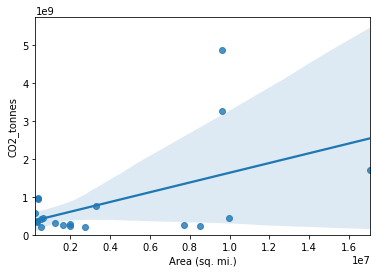

In [161]:
sns.regplot(x="Area (sq. mi.)", y="CO2_tonnes", data=top_co2)
plt.ylim(0,)

(0.0, 20611862323.86649)

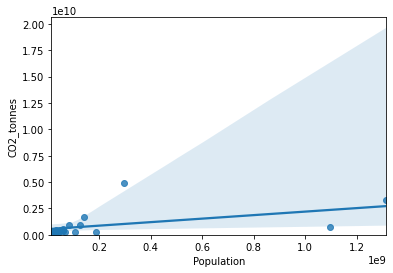

In [162]:
sns.regplot(x="Population", y="CO2_tonnes", data=top_co2)
plt.ylim(0,)

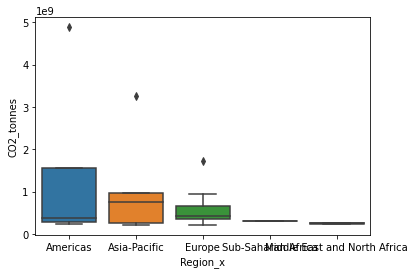

In [163]:
sns.boxplot(x="Region_x", y="CO2_tonnes", data=top_co2)

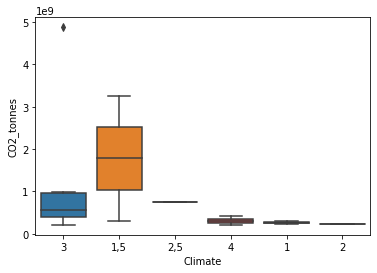

In [164]:
sns.boxplot(x="Climate", y="CO2_tonnes", data=top_co2)

In [165]:
co2_index.describe(include='all')

,Country_Name,CO2_tonnes,CountryID,WEBNAME,Region_x,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,164,164.00,164.00,164,164,164.00,164.00,164.00,164.00,164.00,...,157.00,158.00,158.00,158.00,143,157.00,157.00,158.00,158.00,158.00
unique,164,nan,nan,164,5,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,6,nan,nan,nan,nan,nan
top,Australia,nan,nan,GuineaBissau,Europe,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,2,nan,nan,nan,nan,nan
freq,1,nan,nan,1,43,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,68,nan,nan,nan,nan,nan
mean,NaN,"125,849,129.42",91.21,NaN,NaN,89.23,20.27,61.24,53.80,46.23,...,193.58,15.69,4.18,80.13,NaN,22.71,9.90,0.16,0.30,0.54
std,NaN,"490,269,710.67",53.36,NaN,NaN,51.58,12.52,10.51,19.12,17.74,...,196.00,14.26,7.15,16.72,NaN,11.53,5.16,0.14,0.13,0.15
min,NaN,"32,865.81",1.00,NaN,NaN,1.00,1.00,25.90,7.60,10.00,...,1.30,0.00,0.00,33.33,NaN,7.29,2.41,0.00,0.04,0.06
25%,NaN,"1,691,283.18",46.75,NaN,NaN,44.75,10.00,54.90,37.55,33.25,...,23.70,4.07,0.28,69.85,NaN,12.14,6.22,0.04,0.21,0.43
50%,NaN,"10,300,250.73",91.50,NaN,NaN,90.50,19.00,60.75,52.65,43.65,...,125.60,11.38,1.46,84.73,NaN,20.48,8.60,0.11,0.29,0.56
75%,NaN,"57,441,210.32",136.25,NaN,NaN,131.50,30.00,67.88,66.17,55.57,...,304.80,23.28,4.44,93.88,NaN,30.65,12.17,0.23,0.35,0.65


In [166]:
def swarmplot(
    *,
    x=None, y=None,
    hue=None, data=None,
    order=None, hue_order=None,
    dodge=False, orient=None, color=None, palette=None,
    size=5, edgecolor="gray", linewidth=0, ax=None,
    hue_norm=None, fixed_scale=True, formatter=None, warn_thresh=.05,
    **kwargs
):

    p = _CategoricalPlotterNew(
        data=data,
        variables=_CategoricalPlotterNew.get_semantics(locals()),
        order=order,
        orient=orient,
        require_numeric=False,
    )

    if ax is None:
        ax = plt.gca()

    if fixed_scale or p.var_types[p.cat_axis] == "categorical":
        p.scale_categorical(p.cat_axis, order=order, formatter=formatter)

    p._attach(ax)

    if not p.has_xy_data:
        return ax

    palette, hue_order = p._hue_backcompat(color, palette, hue_order)

    color = _default_color(ax.scatter, hue, color, kwargs)

    p.map_hue(palette=palette, order=hue_order, norm=hue_norm)

    # XXX Copying possibly bad default decisions from original code for now
    kwargs.setdefault("zorder", 3)
    size = kwargs.get("s", size)

    if linewidth is None:
        linewidth = size / 10

    kwargs.update(dict(
        s=size ** 2,
        linewidth=linewidth,
    ))

    p.plot_swarms(
        dodge=dodge,
        color=color,
        edgecolor=edgecolor,
        warn_thresh=warn_thresh,
        plot_kws=kwargs,
    )

    # XXX this happens inside a plotting method in the distribution plots
    # but maybe it's better out here? Alternatively, we have an open issue
    # suggesting that _attach could add default axes labels, which seems smart.
    p._add_axis_labels(ax)
    p._adjust_cat_axis(ax, axis=p.cat_axis)

    return ax

In [167]:
def set_theme(context="notebook", style="darkgrid", palette="deep",
              font="sans-serif", font_scale=1, color_codes=True, rc=None):
    """
    Set aspects of the visual theme for all matplotlib and seaborn plots.
    This function changes the global defaults for all plots using the
    :ref:`matplotlib rcParams system <matplotlib:matplotlib-rcparams>`.
    The themeing is decomposed into several distinct sets of parameter values.
    The options are illustrated in the :doc:`aesthetics <tutorial/aesthetics>`
    and :doc:`color palette <tutorial/color_palettes>` tutorials.
    Parameters
    ----------
    context : string or dict
        Scaling parameters, see :func:`plotting_context`.
    style : string or dict
        Axes style parameters, see :func:`axes_style`.
    palette : string or sequence
        Color palette, see :func:`color_palette`.
    font : string
        Font family, see matplotlib font manager.
    font_scale : float, optional
        Separate scaling factor to independently scale the size of the
        font elements.
    color_codes : bool
        If ``True`` and ``palette`` is a seaborn palette, remap the shorthand
        color codes (e.g. "b", "g", "r", etc.) to the colors from this palette.
    rc : dict or None
        Dictionary of rc parameter mappings to override the above.
    Examples
    --------
    .. include:: ../docstrings/set_theme.rst
    """
    set_context(context, font_scale)
    set_style(style, rc={"font.family": font})
    set_palette(palette, color_codes=color_codes)
    if rc is not None:
        mpl.rcParams.update(rc)


In [168]:
#sns.set_theme(style="whitegrid", palette="muted")



# Draw a categorical scatterplot to show each observation
#ax = sns.swarmplot(data=co2_index, x="Country_Name", y="CO2_tonnes", hue="Region_x")
#ax.set(ylabel="")

In [169]:
#Numerical data distribution

co2_num = co2_index.select_dtypes(include = ['float64', 'int64','datetime64'])
co2_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 232
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CO2_tonnes                          164 non-null    float64
 1   CountryID                           164 non-null    float64
 2   World Rank                          164 non-null    float64
 3   Region Rank                         164 non-null    float64
 4   2019 Score                          164 non-null    float64
 5   Property Rights                     164 non-null    float64
 6   Judical Effectiveness               164 non-null    float64
 7   Government Integrity                164 non-null    float64
 8   Tax Burden                          164 non-null    float64
 9   Gov't Spending                      164 non-null    float64
 10  Fiscal Health                       164 non-null    float64
 11  Business Freedom                    164 non-n

In [170]:
#print(co2_index['Year'].describe())

In [171]:
print(co2_num.describe().transpose())

                                    count           mean            std  \
CO2_tonnes                         164.00 125,849,129.42 490,269,710.67   
CountryID                          164.00          91.21          53.36   
World Rank                         164.00          89.23          51.58   
Region Rank                        164.00          20.27          12.52   
2019 Score                         164.00          61.24          10.51   
Property Rights                    164.00          53.80          19.12   
Judical Effectiveness              164.00          46.23          17.74   
Government Integrity               164.00          42.63          20.20   
Tax Burden                         164.00          77.32          11.95   
Gov't Spending                     164.00          65.02          21.67   
Fiscal Health                      164.00          67.39          30.61   
Business Freedom                   164.00          64.27          15.10   
Labor Freedom            

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa66d9d6890>,
      dtype=object)

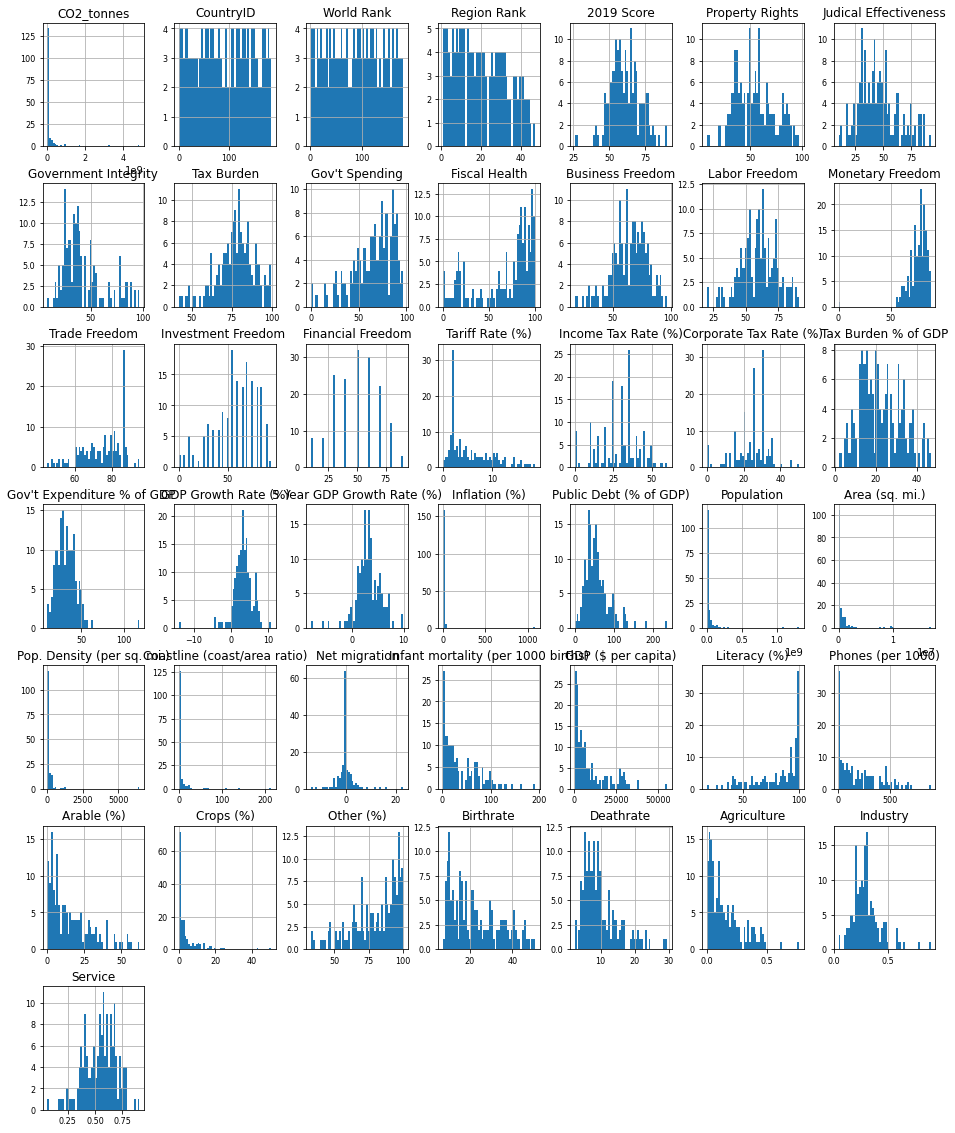

In [172]:
#Plot histograms of numeric data

co2_index.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [173]:
#too large
#sns.pairplot(co2_index)

In [174]:
#plt.figure(figsize=(20,20))
#sns.heatmap(corr,annot=True)

In [175]:
# Separate features and labels
X, y = co2_index[['World Rank','Property Rights', 'Judical Effectiveness','Government Integrity','Tax Burden','Business Freedom','Trade Freedom', 'Financial Freedom', 'GDP Growth Rate (%)']].values, co2_index['CO2_tonnes'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.52e+02 1.96e+01 2.96e+01 2.52e+01 9.17e+01 4.92e+01 6.60e+01 1.00e+01
  2.50e+00]
 [5.20e+01 5.48e+01 3.06e+01 4.04e+01 8.63e+01 6.93e+01 8.78e+01 7.00e+01
  3.90e+00]
 [1.71e+02 3.16e+01 3.62e+01 2.89e+01 7.64e+01 6.16e+01 6.74e+01 3.00e+01
  2.00e+00]
 [1.56e+02 3.59e+01 2.66e+01 2.05e+01 8.39e+01 5.57e+01 6.12e+01 4.00e+01
  7.00e-01]
 [1.48e+02 4.78e+01 4.45e+01 3.35e+01 6.93e+01 5.64e+01 7.00e+01 6.00e+01
  2.90e+00]
 [4.70e+01 5.72e+01 4.63e+01 3.86e+01 8.47e+01 7.83e+01 8.08e+01 7.00e+01
  7.50e+00]
 [5.00e+00 7.91e+01 8.65e+01 7.99e+01 6.28e+01 8.83e+01 8.76e+01 9.00e+01
  2.30e+00]
 [3.10e+01 8.42e+01 7.13e+01 7.74e+01 5.05e+01 7.49e+01 8.60e+01 7.00e+01
  2.90e+00]
 [6.00e+01 5.91e+01 5.31e+01 4.47e+01 8.75e+01 6.95e+01 7.46e+01 6.00e+01
  1.00e-01]
 [7.60e+01 4.22e+01 4.69e+01 4.37e+01 9.73e+01 6.85e+01 4.78e+01 6.00e+01
  1.30e+00]]

Labels:
[2.87103519e+06 4.49279113e+06 6.84917457e+07 1.02500819e+07
 1.20164429e+08 4.66105881e+06 2.62833488e+08 5.84930460e+0

In [176]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 114 rows
Test Set: 50 rows


In [177]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
#print (model)

In [178]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [ 7.77864130e+07 -8.72294770e+07  4.33229954e+08  3.47913683e+08
  1.35641324e+08  4.03311452e+08  5.81811020e+07 -3.68849750e+07
 -5.47644470e+07  3.27442870e+08]
Actual labels   :  [1.04023839e+06 1.35681535e+06 2.46260449e+07 5.84930460e+07
 1.63275915e+06 9.53069411e+08 3.00113356e+08 3.53745620e+06
 3.24133581e+06 9.06142005e+07]


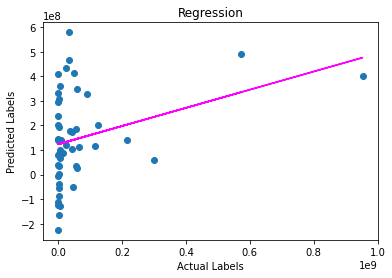

In [179]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Regression')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [180]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 4.693841861989314e+16
RMSE: 216652760.47143534
R2: -0.8769636742577058


Lasso() 

MSE: 4.693841857208023e+16
RMSE: 216652760.36109078
R2: -0.8769636723457734


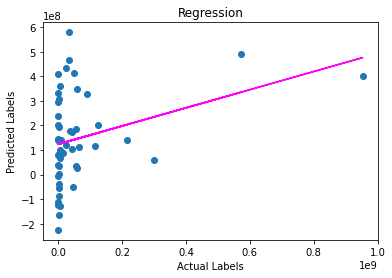

In [181]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Regression')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [182]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_2 <= 74.95
|   |--- feature_5 <= 78.35
|   |   |--- feature_2 <= 61.40
|   |   |   |--- feature_5 <= 62.00
|   |   |   |   |--- feature_2 <= 49.30
|   |   |   |   |   |--- feature_3 <= 11.85
|   |   |   |   |   |   |--- value: [115376125.78]
|   |   |   |   |   |--- feature_3 >  11.85
|   |   |   |   |   |   |--- feature_5 <= 55.95
|   |   |   |   |   |   |   |--- feature_0 <= 177.50
|   |   |   |   |   |   |   |   |--- feature_5 <= 53.95
|   |   |   |   |   |   |   |   |   |--- feature_8 <= 7.00
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 69.90
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  69.90
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- feature_8 >  7.00
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 29.75
|   |   |   |   |   |   |   |   |   |   |   |--- value

MSE: 3.213924744645018e+17
RMSE: 566914874.0900187
R2: -11.851775102069695


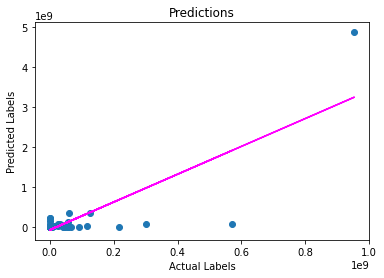

In [183]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

RandomForestRegressor() 

MSE: 1.8894909376981764e+16
RMSE: 137458755.18489814
R2: 0.2444343126217826


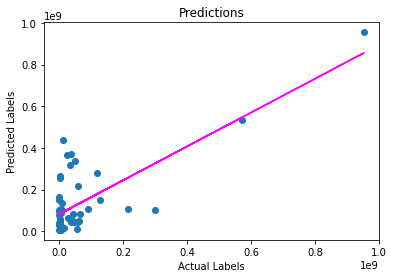

In [184]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor() 

MSE: 2.4663888553113366e+17
RMSE: 496627511.85484445
R2: -8.862544210322957


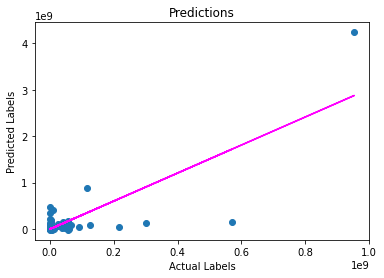

In [185]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Best parameter combination: {'learning_rate': 0.5, 'n_estimators': 150} 

GradientBoostingRegressor(learning_rate=0.5, n_estimators=150) 

MSE: 2.7023429767075914e+17
RMSE: 519840646.4203806
R2: -9.806072619830273


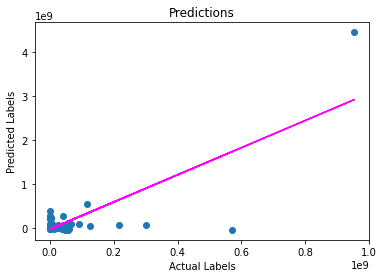

In [186]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [187]:
world = pd.read_csv("/kaggle/input/countries-of-the-world/countries of the world.csv")

In [188]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [189]:
# counting unique values 
n = world.nunique(axis=0) 
  
print("No.of.unique values in each column :\n", 
      n)

No.of.unique values in each column :
 Country                               227
Region                                 11
Population                            227
Area (sq. mi.)                        226
Pop. Density (per sq. mi.)            219
Coastline (coast/area ratio)          151
Net migration                         157
Infant mortality (per 1000 births)    220
GDP ($ per capita)                    130
Literacy (%)                          140
Phones (per 1000)                     214
Arable (%)                            203
Crops (%)                             162
Other (%)                             209
Climate                                 6
Birthrate                             220
Deathrate                             201
Agriculture                           150
Industry                              155
Service                               167
dtype: int64


In [190]:
df.drop_duplicates(subset=['brand', 'style'], keep='last')i

SyntaxError: invalid syntax (<ipython-input-190-7df13cf522b8>, line 1)